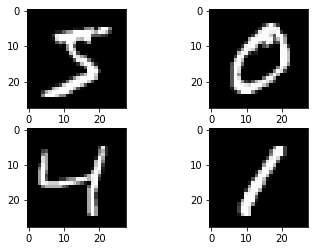

In [3]:
# Importing the relevant libraries and modules
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

# load mnist data set
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# X_train and X_test are three dimensional matrices
# X_train --> (60000, 28, 28)
# y_train --> (10000, 28, 28)

# y_train and y_test are vectors 
# y_train --> (60000,)
# y_test  --> (10000,)

# Visualizing the some of the images
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))

plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))

plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))

plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

#plt.savefig("First four images")


In [4]:
# PREPROCESSING

# save original test data and labels
actual_test_labels = y_test
actual_test_data = X_test

#flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [5]:
y_train[0]
actual_test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [6]:
num_classes = y_test.shape[1]


# create model
model = Sequential()
model.add(Dense(num_pixels, input_dim=num_pixels, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=60000, verbose=2)


# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Error is: %.2f%%" % (100-scores[1]*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 2.3609 - accuracy: 0.0986 - val_loss: 2.2523 - val_accuracy: 0.0968
Epoch 2/10
 - 1s - loss: 2.2519 - accuracy: 0.1000 - val_loss: 2.1851 - val_accuracy: 0.4217
Epoch 3/10
 - 1s - loss: 2.1870 - accuracy: 0.4208 - val_loss: 2.1276 - val_accuracy: 0.5297
Epoch 4/10
 - 1s - loss: 2.1311 - accuracy: 0.5300 - val_loss: 2.0609 - val_accuracy: 0.5409
Epoch 5/10
 - 1s - loss: 2.0659 - accuracy: 0.5380 - val_loss: 1.9786 - val_accuracy: 0.5678
Epoch 6/10
 - 1s - loss: 1.9849 - accuracy: 0.5611 - val_loss: 1.8818 - val_accuracy: 0.6188
Epoch 7/10
 - 1s - loss: 1.8894 - accuracy: 0.6116 - val_loss: 1.7752 - val_accuracy: 0.7264
Epoch 8/10
 - 1s - loss: 1.7837 - accuracy: 0.7198 - val_loss: 1.6630 - val_accuracy: 0.7865
Epoch 9/10
 - 1s - loss: 1.6725 - accuracy: 0.7783 - val_loss: 1.5498 - val_accuracy: 0.8041
Epoch 10/10
 - 1s 

In [8]:
# Predicting the output of first four X_test images
pred = model.predict(X_test[0:4], batch_size=10, verbose=0)

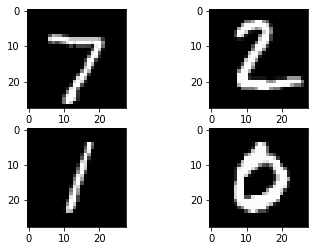

In [9]:
# Visualizing the some of the X_test images
plt.subplot(221)
plt.imshow(actual_test_data[0], cmap=plt.get_cmap('gray'))

plt.subplot(222)
plt.imshow(actual_test_data[1], cmap=plt.get_cmap('gray'))

plt.subplot(223)
plt.imshow(actual_test_data[2], cmap=plt.get_cmap('gray'))

plt.subplot(224)
plt.imshow(actual_test_data[3], cmap=plt.get_cmap('gray'))

In [10]:
for i in pred:
    max_prob = max(i)
    predicted_out = np.where(i == max_prob)
    print("\nPredicted output:", predicted_out[0], end = '')


Predicted output: [7]
Predicted output: [2]
Predicted output: [1]
Predicted output: [0]

In [11]:
# Creating confusion matrix
predicted_class = model.predict_classes(X_test, batch_size = 10)

from sklearn import metrics
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
print("Confusion matrix for MLP:\n", metrics.confusion_matrix(actual_test_labels, predicted_class, labels=classes))
# y axis --> true label
# x axis --> predicted label

print("\nClassification report:\n", metrics.classification_report(actual_test_labels, predicted_class))

Confusion matrix for MLP:
 [[ 862    1    3    9    0   28   65    1    8    3]
 [   0 1097    5    2    1   15    9    0    6    0]
 [  24   53  735   53   16    2   93   16   36    4]
 [   3   27   24  847    0   37   22   20   16   14]
 [   2   22    2    0  787    6   38    3    1  121]
 [  15   38    4   96   20  646   40   11    6   16]
 [  20   19    7    0   10   15  887    0    0    0]
 [   1   60   10    1   12    2    8  874    9   51]
 [  15   52    6  131   20   77   30   14  588   41]
 [  16   25    3   12  119   11    5   56    9  753]]

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       980
           1       0.79      0.97      0.87      1135
           2       0.92      0.71      0.80      1032
           3       0.74      0.84      0.78      1010
           4       0.80      0.80      0.80       982
           5       0.77      0.72      0.75       892
           6       0.74      0.93     

In [4]:
# Simple CNN for the MNIST Dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# save original test data and labels
actual_test_labels = y_test
actual_test_data = X_test


# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


# create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               262272    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 264,394
Trainable params: 264,394
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.2798 - accuracy: 0.9204 - val_loss: 0.0857 - val_accuracy: 0.9756
Epoch 2/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.0760 - accuracy: 0.9779 - val_loss: 0.0564 - val_accuracy: 0.9827
Epoch 3/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.0533 - accuracy: 0.9838 - val_loss: 0.0487 - val_accuracy: 0.9846
Epoch 4/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.0413 - accuracy: 0.9871 - val_loss: 0.0409 - val_accuracy: 0.9864
Epoch 5/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.0347 - accuracy: 0.9891 - val_loss: 0.0362 - val_accuracy: 0.9888
Epoch 6/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.0289 - accuracy: 0.9910 - val_loss: 0.0359 - val_accuracy: 0.9877
Epoch 7/10
60000/60000 [==============================] 

In [14]:
# Predicting the output of first four X_test images
pred = model.predict(X_test[0:4], batch_size=10, verbose=0)

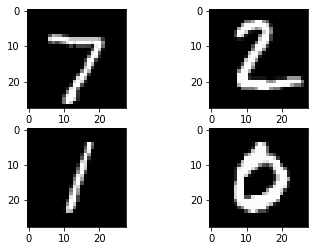

In [16]:
# Visualizing the some of the X_test images
plt.subplot(221)
plt.imshow(actual_test_data[0], cmap=plt.get_cmap('gray'))

plt.subplot(222)
plt.imshow(actual_test_data[1], cmap=plt.get_cmap('gray'))

plt.subplot(223)
plt.imshow(actual_test_data[2], cmap=plt.get_cmap('gray'))

plt.subplot(224)
plt.imshow(actual_test_data[3], cmap=plt.get_cmap('gray'))


In [17]:
for i in pred:
    max_prob = max(i)
    predicted_out = np.where(i == max_prob)
    print("\nPredicted output:", predicted_out[0], end = '')


Predicted output: [7]
Predicted output: [2]
Predicted output: [1]
Predicted output: [0]

In [18]:
# Creating confusion matrix
predicted_class = model.predict_classes(X_test, batch_size = 10)

from sklearn import metrics
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
print("Confusion matrix for CNN:\n", metrics.confusion_matrix(actual_test_labels, predicted_class, labels=classes))
# y axis --> true label
# x axis --> predicted label

print("\nClassification report:\n", metrics.classification_report(actual_test_labels, predicted_class))

Confusion matrix for MLP:
 [[ 976    0    1    1    0    1    0    0    1    0]
 [   0 1131    4    0    0    0    0    0    0    0]
 [   0    1 1028    0    0    0    0    3    0    0]
 [   0    0    3  996    0    5    0    0    3    3]
 [   0    0    1    0  971    0    0    0    0   10]
 [   1    0    0    2    0  888    1    0    0    0]
 [   6    3    0    0    1    1  946    0    1    0]
 [   1    2   12    1    0    0    0 1002    1    9]
 [   4    1    3    1    0    1    0    2  957    5]
 [   0    0    0    1    3    2    0    0    1 1002]]

Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      1.00      0.99       892
           6       1.00      0.99     

In [19]:
np.sum(metrics.confusion_matrix(actual_test_labels, predicted_class, labels=classes))

10000